In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
import requests as req
from textblob import TextBlob
from textblob import Word

%matplotlib inline

## Write-up

Here is another publicly available document set of MBTI classified dataset (lucky me some more!)

The difference is that the data is labeled differently. Instead of the type displayed outright, the approach is to model with a base function and a directed function. This is another appproach to MBTI typology with their own set of explanations, but I will shall explain very briefly for purpose of this project.

Basically, for every MBTI type, there is a dominant and auxillary personality function pair accompanying it, which can be determined simply by looking at the MBTI type. A personality function is derived from the Sensing/Intuitive and Thinking/Feeling type, and for each of the two pairs they have an extraverted and introverted side. So for example, a person who has Sensing as a dominant trait can have either extraverted sensing or introverted sensing trait, denoted by Se or Si. Same goes for one with a Feeling dominant trait, either Fe or Fi. Whether a person has Se or Si is determined by their Judging/Perceiving trait. For one with a dominant Judging trait, their S/N would be introverted (Si and Ni) while their T/F would be extraverted (Te and Fe). The opposite goes for a dominant Perceiving trait. For example, an SFJ person would have Si and Fe personality functions. Last but not least, E/I determines which of them is dominant/auxillary, so for the ESFJ person he/she would have Fe as dominant and Si as auxillary, the other way around for an ISFJ person. This is but a write-up detailing the simple derivation of personality function pairs from the MBTI type, do read it up if you wish to find out more (this is a Jupyter notebook write-up, I will spoonfeed you here.)

A little unfortunately for us the dataset only displays the directed function (which we shall assume to be the dominant personality function) so the data is not so 'complete', but with the method detailed from the previous paragraph we can determine at least 3 of the 4 personality type pairs from each data point.

In [71]:
lalala = pd.read_csv('blog_texts_and_cognitive_function.csv', sep=';', encoding='utf-8')

In [72]:
lalala.head(20)

,Unnamed: 0,text,base_function,directed_function
0,1,❀*a drop of colour*❀ 1/39 next→ home ask past ...,f,fi
1,2,Neko cool kids can't die home family daveblog ...,t,ti
2,3,Anything... Anything Mass Effect-related Music...,f,fe
3,5,Perpetually In Transit Perpetually In Transit ...,f,fi
4,10,Unspoken « The Aardvark's Blog Home About The ...,t,ti
5,11,-Only One of Many- Follow on Tumblr Ask me eve...,n,ni
6,14,"And I had a feeling I could be someone, be som...",t,ti
7,15,A Spew of Random Shit A Spew of Random Shit Ju...,f,fi
8,16,noon's house home archive message about art → ...,s,si
9,17,noon's house home archive message about art → ...,f,fe


#### Try: Spellcheck

In [81]:
TextBlob(lalala['text'][23])

TextBlob("-Only One of Many- Follow on Tumblr Ask me everything!!!!!! :D RSS Feed Archive Home -Only One of Many- Welcome. I see you've taken up an interest with studying the dork species? Well, here you'll find the best dork to study. Her name is Ashley. She's freshmeat at Syracuse University. Here, you can see the inner thoughts and feelings of the dork. Maybe a better understanding of such a species can help fight world hunger, battle cancer, or even better: be cool. Feel free to browse this convenient blog. I'm sure Ashley is dying to have some company. If you have any questions about this mental facility, please drop us a line and we will get back to you ASAP. Search Posts eatsleepdraw : The Owl Sep 12, 2012 1:59 pm eatsleepdraw 365 notes It’s hard to hate people when you know them. Maybe it’s because you’ve seen their dark side… and the fact that you’ve seen it makes you feel more special than most who haven’t. They say not to judge off first impressions. I suppose you shouldn’t 

In [82]:
TextBlob(lalala['text'][23]).correct()

TextBlob("-Only One of Any- Follow on Number Ask me everything!!!!!! :D RSS Need Archive Some -Only One of Any- Welcome. I see you've taken up an interest with studying the work species? Well, here you'll find the best work to study. Her name is Schley. The's freshmeat at Syracuse University. Were, you can see the inner thoughts and feelings of the work. Maybe a better understanding of such a species can help fight world hunger, battle cancer, or even better: be cool. Feel free to brows this convenient blow. I'm sure Schley is dying to have some company. Of you have any questions about this mental facility, please drop us a line and we will get back to you ASAP. Search Posts eatsleepdraw : The Owl Rep 12, 2012 1:59 pm eatsleepdraw 365 notes It’s hard to hate people when you know them. Maybe it’s because you’ve seen their dark side… and the fact that you’ve seen it makes you feel more special than most who haven’t. They say not to judge off first impressions. I suppose you shouldn’t jud

Verdict: It made way more unnecessary spelling corrections when the original words actually carry a different meaning and are totally valid. For example it changed Tumblr to Number and Ashley to Schley (now thats weird), and even changed browse to brows! Much more 'correct' words got misspelled into 'wrong' words, which means it is flawed. Abandon the spelling ship.

#### Try: Language detection

In [84]:
#Will take a while
lalala['lang'] = lalala['text'].apply(lambda x: TextBlob(x).detect_language())
lalala[lalala['lang'] != 'en'].head(20)

,Unnamed: 0,text,base_function,directed_function,lang
175,274,spoke just like a baroness zoom il y a 2 mi...,t,ti,fr
392,555,Sivertzen Digital About Portfolio Consulting T...,n,ni,sv
566,856,ninniu | I det konstant föränderliga ninniu I ...,f,fi,sv
614,925,: : : : : : : : : STICKY DROSERA : : : : : : :...,t,ti,de
647,975,Abhishek's blog অভিষেকের ব্লগ skip to main | s...,n,ni,bn
671,1009,��������}irI��o���! �����n���,f,fi,lt
676,1029,��������}�v�Ʋ�oy��C�ޱ���/�d�#˲%ǒlI����p�H...,f,fe,zh-CN
766,1210,EDUCATIONAL TECHNOLOGY | Ilmu adalah sinar yg ...,f,fi,ms
918,1443,Incastellanizable Incastellanizable Hay cosas ...,f,fi,es
1065,1666,"It's Not Me, It's You It's Not Me, It's You It...",f,fi,tr


In [95]:
print lalala[lalala['lang'] != 'en']['text'][1496]
print lalala[lalala['lang'] != 'en']['text'][1296]

하루만 Untitled Document “그래 나팔꽃이 필 때 만나 헤어지자 꽃이 질 때“ |A.R.M.Y| ISFP | home message bangtan archive credit  
Les Orchidées Sont Partout!: Our famous heritage: Vanda Tan Chay Yan 


In [103]:
#Before we translate, let us do some visualization of the language representation for the fun of it:
lalala['lang'].value_counts()

en       22372
ja          62
fr          30
de          16
es          15
ko          11
la           8
ru           8
zh-CN        7
vi           6
sv           6
nl           4
ar           4
pt           4
id           4
ms           4
it           3
zh-TW        3
el           3
pl           2
lt           2
cy           2
af           1
bn           1
is           1
sr           1
da           1
ca           1
fi           1
hr           1
hi           1
ta           1
tl           1
tr           1
Name: lang, dtype: int64

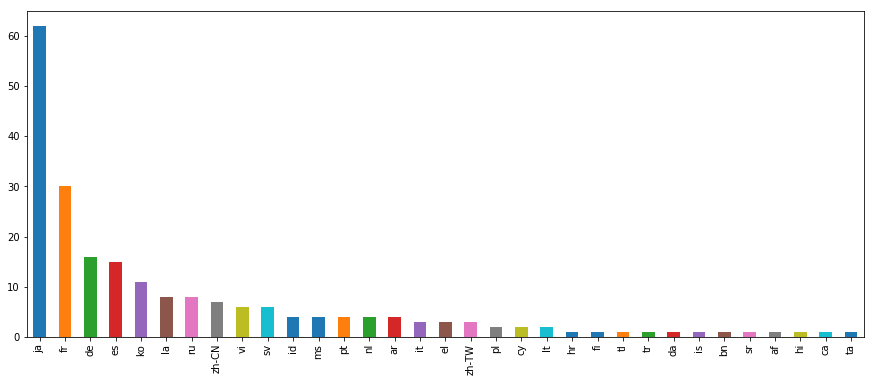

In [121]:
plt.figure(figsize=(15,6))
lalala[lalala['lang'] != 'en']['lang'].value_counts().plot.bar()

In [158]:
def transl(x):
    """
    Keep english translation and translate other language text into english
    
    """
    if x['lang'] != 'en':
        bloby = TextBlob(x['text'])
        try:
            return str(bloby.translate())
        except: 
            return x['text']
    else:
        return x['text']

In [159]:
lalala['text1'] = lalala.apply(transl, axis=1)
#We do some comparison with non-english text
lalala[lalala['lang'] != 'en'].head()

,Unnamed: 0,text,base_function,directed_function,lang,text1
175,274,spoke just like a baroness zoom il y a 2 mi...,t,ti,fr,spoke just like a baroness zoom 2 minutes ago ...
392,555,Sivertzen Digital About Portfolio Consulting T...,n,ni,sv,Sivertzen Digital About Portfolio Consulting T...
566,856,ninniu | I det konstant föränderliga ninniu I ...,f,fi,sv,ninniu | In the constantly changing ninniu I'm...
614,925,: : : : : : : : : STICKY DROSERA : : : : : : :...,t,ti,de,::::::::: STICKY DROSERA:::::::::: STICKY DROS...
647,975,Abhishek's blog অভিষেকের ব্লগ skip to main | s...,n,ni,bn,Abhishek's blog Abhishek's blog skip to main |...


In [ ]:
#See how the translation went
# def twotext(x):
#     print lalala['text'][x]
#     print lalala['text1'][x]
    
# twotext(647)

In [165]:
lalala['text'] = lalala['text1']
lalala.drop(['text1'], axis=1, inplace=True)
lalala.head()

,Unnamed: 0,base_function,directed_function,text
0,1,f,fi,❀*a drop of colour*❀ 1/39 next→ home ask past ...
1,2,t,ti,Neko cool kids can't die home family daveblog ...
2,3,f,fe,Anything... Anything Mass Effect-related Music...
3,5,f,fi,Perpetually In Transit Perpetually In Transit ...
4,10,t,ti,Unspoken « The Aardvark's Blog Home About The ...


So as it is, all those that 'failed to translate' were really short sentences that we will process shortly. Otherwise everything else looks ok

In [143]:
lalala.loc[22576,'text']

u"/ ._> | | | '_>/ ._>| . \\/ ._>| || |/ ._> | _/\\___/`___||_| \\___. |_| |_| \\___.|___/\\___.|_||_|\\___. |_| --> I have a bad feeling about this. \u21d1 I have a bad feeling about this. // archive / Ask me anything Anna, 19, a mess.\xa0 text posted 21 hours ago with 901 notes tagged: I've said it a million times already but that's exactly how I realized I liked girls when I was in 7th grade reblogged from closetedlesbianopinions originally by closetedlesbianopinions : I sure do love the character thirteen on house text posted 21 hours ago with 132 notes tagged: Me reblogged from closetedlesbianopinions originally by closetedlesbianopinions closetedlesbianopinions : I didn\u2019t have any Ken dolls when I was younger so I just used my other Barbie dolls and made them kiss!! Totally straight tho it was a Dire Situation :) photo posted 2 days ago with 3,657 notes reblogged from emrysmirari originally by sandandglass (Source: sandandglass ) quote posted 2 days ago with 1,530 notes rebl

Looking at the target variables now:

In [166]:
lalala['base_function'].value_counts()

n    9380
f    6063
t    4502
s    2643
Name: base_function, dtype: int64

In [167]:
lalala['is_J'] = lalala['directed_function'].apply(lambda x: '1' if x in ['ni','si','te','fe'] else '0')
lalala['is_E'] = lalala['directed_function'].apply(lambda x: '1' if x[1] == 'e' else '0')
lalala['is_S'] = lalala['base_function'].apply(lambda x: '1' if x == 's' else '0' if x == 'n' else None)
lalala['is_T'] = lalala['base_function'].apply(lambda x: '1' if x == 't' else '0' if x == 'f' else None)

In [168]:
lalala.head(20)

,Unnamed: 0,base_function,directed_function,text,is_J,is_E,is_S,is_T
0,1,f,fi,❀*a drop of colour*❀ 1/39 next→ home ask past ...,0,0,None,0
1,2,t,ti,Neko cool kids can't die home family daveblog ...,0,0,None,1
2,3,f,fe,Anything... Anything Mass Effect-related Music...,1,1,None,0
3,5,f,fi,Perpetually In Transit Perpetually In Transit ...,0,0,None,0
4,10,t,ti,Unspoken « The Aardvark's Blog Home About The ...,0,0,None,1
5,11,n,ni,-Only One of Many- Follow on Tumblr Ask me eve...,1,0,0,None
6,14,t,ti,"And I had a feeling I could be someone, be som...",0,0,None,1
7,15,f,fi,A Spew of Random Shit A Spew of Random Shit Ju...,0,0,None,0
8,16,s,si,noon's house home archive message about art → ...,1,0,1,None
9,17,f,fe,noon's house home archive message about art → ...,1,1,None,0


In [169]:
lalala['directed_function'].value_counts()

ni    7315
fi    5313
ti    4062
si    2082
ne    2065
fe     750
se     561
te     440
Name: directed_function, dtype: int64

In [170]:
lalala['is_J'].value_counts()

0    12001
1    10587
Name: is_J, dtype: int64

In [171]:
lalala['is_E'].value_counts()

0    18772
1     3816
Name: is_E, dtype: int64

In [172]:
lalala['is_S'].value_counts()

0    9380
1    2643
Name: is_S, dtype: int64

In [173]:
lalala['is_T'].value_counts()

0    6063
1    4502
Name: is_T, dtype: int64

It looks like we have a potential semi-supervised problem to fill up the missing S/N and T/F values. Do we now bring in...our other counterpart?? The forum data?

I opted not to, let us do an internal run first.

In [174]:
lalala['len'] = lalala['text'].apply(len)

In [175]:
lalala.sort_values(['len'])

,Unnamed: 0,base_function,directed_function,text,is_J,is_E,is_S,is_T,len
19552,21796,f,fi,﻿,0,0,None,0,3
14359,16189,f,fi,﻿,0,0,None,0,3
14360,16190,t,ti,﻿,0,0,None,1,3
13404,15159,n,ne,An,0,1,0,None,4
9949,11440,n,ne,8bP,0,1,0,None,4
18898,21051,t,ti,middle,0,0,None,1,6
4016,5105,n,ni,golly,1,0,0,None,7
18682,20821,n,ne,Jason,0,1,0,None,7
20160,22493,f,fi,Theme,0,0,None,0,7
8166,9542,s,si,my blog,1,0,1,None,8


On observation it is scary to see some data points with so few characters! Those text would serve as ill representation of the target variable as the quality of features extracted from them would be poor.

To overcome this problem, we simply discard the rows where the len is small. What we can do also is to cross our fingers and hope that there are still enough data points after the discarding.

In [176]:
lalala[lalala['len'] > 500].shape

(18932, 9)

In [177]:
lalala[lalala['len'] > 1000].shape

(16333, 9)

In [178]:
lalala[lalala['len'] > 2000].shape

(10951, 9)

In [179]:
lalala[lalala['len'] > 10000].shape

(773, 9)

Below shows the maximum post string below 1000 characters:

In [180]:
lalala[lalala['len']<1000].head(20).sort_values(['len'], ascending=False)['text'].iloc[0]

u'A Spew of Random Shit A Spew of Random Shit Just stuff that this ENTP 5w4 finds cool. Located in Canada, because I detest warm weather. And I really love BioWare. Queries 14 notes Reblog \u2665 14 - 11 minutes ago 11 notes Reblog \u2665 11 - 11 minutes ago 30,906 notes Reblog \u2665 30906 - 15 minutes ago 53 notes Reblog \u2665 53 - 46 minutes ago 225 notes Reblog \u2665 225 - 46 minutes ago frezned: Comma Lent is the month in which people rephrase their sentences to... frezned : Comma Lent is the month in which people rephrase their sentences to avoid commas. The easiest way is to just split thoughts up into distinct sentences (using parentheticals if necessary)<semic> semicolons can help ease the feeling of abruptness but should not be used as a drop-in comma replacement. \u2026 \u2665 52 - 47 minutes ago 84 notes Reblog \u2665 84 - 56 minutes ago 9 notes Reblog \u2665 9 - 57 minutes ago PHOTOSET See full set \u2665 67 - 57 minutes ago 5 notes Reblog \u2665 5 - 59 minutes ago A Spe

Text(0,0.5,u'No. rows')

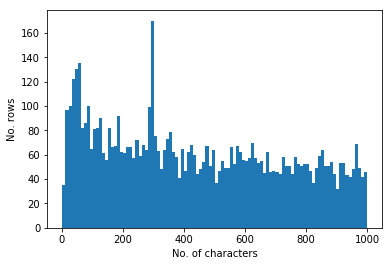

In [181]:
plt.hist(lalala[lalala['len']<1000]['len'], bins=100)
plt.xlabel("No. of characters")
plt.ylabel("No. rows")

#### Ok split the dataframe here

In [182]:
lala = lalala[lalala['len']>1000]

In [183]:
#Extract URLs from text
lala['weblist'] = lala['text'].apply(lambda x: re.findall("https?://\S*", x))
lala.head(30)

C:\Users\User\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unnamed: 0,base_function,directed_function,text,is_J,is_E,is_S,is_T,len,weblist
0,1,f,fi,❀*a drop of colour*❀ 1/39 next→ home ask past ...,0,0,None,0,3904,[]
2,3,f,fe,Anything... Anything Mass Effect-related Music...,1,1,None,0,2741,[]
3,5,f,fi,Perpetually In Transit Perpetually In Transit ...,0,0,None,0,10401,[]
4,10,t,ti,Unspoken « The Aardvark's Blog Home About The ...,0,0,None,1,2845,[]
5,11,n,ni,-Only One of Many- Follow on Tumblr Ask me eve...,1,0,0,None,3679,[http://www.ted.com/talks/andrew_stanton_the_c...
8,16,s,si,noon's house home archive message about art → ...,1,0,1,None,5487,[]
9,17,f,fe,noon's house home archive message about art → ...,1,1,None,0,6224,[]
10,18,n,ni,№.7 №.7 Contact Archive About Next sorest個人htt...,1,0,0,None,5563,[http://sorest.tumblr.com/post/30700639010http...
12,21,t,ti,whimsy + glee whimsy + glee thoughts on life +...,0,0,None,1,28759,[]
15,35,n,ni,Lily Malone – Live & Unpublished Lily Malone –...,1,0,0,None,23494,[http://www.abc.net.au/7.30/content/2012/s3582...


In [184]:
#Look at number of text documents which have URLs
lala[lala['weblist'].apply(lambda x: len(x)>0) ].shape

(1905, 10)

In [185]:
lala['weblist'][10]

[u'http://sorest.tumblr.com/post/30700639010http://choayo.tumblr.com/post/30697427205',
 u'http://www.sidis.net/HighQStacey.htm',
 u'http://kingslayer-.tumblr.com/post/30623466835http://ochercanvas.tumblr.com/post/30284792286',
 u'http://onewordinfrontoftheother.tumblr.com/post/29209288174/agnosticism-the-battle-against-shamelesshttp://onewordinfrontoftheother.tumblr.com/post/29209288174/agnosticism-the-battle-against-shameless',
 u'http://stonedinluv.tumblr.com/post/30589196940http://ifonawintersmorning.com/post/20155091500',
 u'http://bopeep.tumblr.com/post/30606602712/wiwt-featuring-the-most-obnoxious-shorts-that-ihttp://bopeep.tumblr.com/post/30606602712/wiwt-featuring-the-most-obnoxious-shorts-that-i',
 u'http://archiphile.tumblr.com/post/30592898276/more-librarieshttp://pacificmoon.tumblr.com/',
 u'http://allisonelisabeta.tumblr.com/post/30576030142http://allisonelisabeta.tumblr.com',
 u'http://teashoots.tumblr.com/post/29540367105http://fashion-and-film.tumblr.com/post/294119272

Same problem that I have faced before, concatenated urls. Let's split them.

In [188]:
#Borrowed from previous project

def eliminate_httpdup(x):
    
    """
    Input = A list containing URLs

    How this function works:
    
    Some URLs that have been extracted happen to be concatenated successively without any separator in between.
    For example, a URL containing the following 'https://www.youtu.be/blahblahhttp://neninenipoopoo...'
    The function iterates through the URLs, identify the URL of the above kind then separates them.
    After separation, the concatenated string is then removed and the two separated URLs are added into the list.
    
    End result: 'https://www.youtu.be/blahblah' 'http://neninenipoopoo...'
    
    Additionally, there are also URLs which are incomplete i.e. 'http://',
    we will check both of the processed ones and drop them accordingly.
    
    This function returns the new list after the processing.
    Unfortunately there may exist multiple (more than 2) concatenated URLs and I still do not yet have the brain to process
    how to do that in one go, so this particular function got to be run multiple times.
    """
    
    wholechunk = list(x) #Must indicate as list, otherwise whatever happens to wholechunk will also happen to x :X
    for line in x:
        if re.match('http.*(?=https?:)', line):
            partchunk = re.match('http.*(?=https?:)', line).group(0)
            secondchunk = line[len(partchunk):]
            wholechunk.remove(line)
            if re.match('https?://.*\.[\w\d].*', partchunk):
                wholechunk.append(partchunk)
            if re.match('https?://.*\.[\w\d].*', secondchunk):
                wholechunk.append(secondchunk)
    return wholechunk

def rollyrolly(x):
    a = 0
    while a != len(x):
        a = len(x)
        x = eliminate_httpdup(x)
    return x

lala['weblist'] = lala['weblist'].apply(rollyrolly)

C:\Users\User\Anaconda2\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [189]:
#Success!!
lala['weblist'][10]

[u'http://www.sidis.net/HighQStacey.htm',
 u'http://sorest.tumblr.com/post/30700639010',
 u'http://choayo.tumblr.com/post/30697427205',
 u'http://kingslayer-.tumblr.com/post/30623466835',
 u'http://ochercanvas.tumblr.com/post/30284792286',
 u'http://onewordinfrontoftheother.tumblr.com/post/29209288174/agnosticism-the-battle-against-shameless',
 u'http://onewordinfrontoftheother.tumblr.com/post/29209288174/agnosticism-the-battle-against-shameless',
 u'http://stonedinluv.tumblr.com/post/30589196940',
 u'http://ifonawintersmorning.com/post/20155091500',
 u'http://bopeep.tumblr.com/post/30606602712/wiwt-featuring-the-most-obnoxious-shorts-that-i',
 u'http://bopeep.tumblr.com/post/30606602712/wiwt-featuring-the-most-obnoxious-shorts-that-i',
 u'http://archiphile.tumblr.com/post/30592898276/more-libraries',
 u'http://pacificmoon.tumblr.com/',
 u'http://allisonelisabeta.tumblr.com/post/30576030142',
 u'http://allisonelisabeta.tumblr.com',
 u'http://teashoots.tumblr.com/post/29540367105',
 u'h

In [190]:
#Get videos link and image link, also borrowed hahah
lala['videolink'] = lala['weblist'].apply(lambda x: [i for i in x if re.match('https?://.*youtu.*|http.*vimeo.*', i)])
lala['imglink'] = lala['weblist'].apply(lambda x: [i for i in x if re.match('.*\.(jpg|png|jpeg|gif).*|.*img.*|.*image.*', i)])

C:\Users\User\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [191]:
lala[lala['imglink'].apply(lambda x: len(x)>0)].shape

(106, 12)

In [192]:
lala[lala['imglink'].apply(lambda x: len(x)>0)].head(10)

,Unnamed: 0,base_function,directed_function,text,is_J,is_E,is_S,is_T,len,weblist,videolink,imglink
85,133,f,fi,The Sport Spot The Sport Spot Adversity causes...,0,0,None,0,84791,[http://www.footytube.com/video/arsenal-chelse...,"[http://www.youtube.com/watch?v=S9jsS6CxONc, h...",[http://25.media.tumblr.com/tumblr_mahtxrzJvm1...
375,528,n,ni,"I open at the close My name's sixteen, and I'm...",1,0,0,None,8073,"[http://artsyposes.com, http://posemaniacs.com...",[],[http://fc00.deviantart.net/fs70/f/2011/210/1/...
481,696,f,fi,"Sorrygnat, World Citizen | Esther Bradley-DeTa...",0,0,None,0,42748,[http://sorrygnat.files.wordpress.com/2013/01/...,[],[http://sorrygnat.files.wordpress.com/2013/01/...
583,883,t,ti,Uncategorized | superchad5000 superchad5000 Ju...,0,0,None,1,11047,[https://signup.netflix.com/Login?nextpage=htt...,[],[http://www.killmydaynow.com/wp-content/upload...
1205,1904,s,si,The Daily Draw | …Where Tarot and Culture Play...,1,0,1,None,8780,"[http://www.kufty.com, http://greenbooks.theon...",[],[http://flowtv.org/wp-content/uploads/2009/08/...
1373,2161,n,ni,"Express and Inspire Lifestyle: Spirituality, A...",1,0,0,None,3337,[http://www.freeimages.com/profile/walker_M],[],[http://www.freeimages.com/profile/walker_M]
1385,2173,n,ne,"Rants, Lists, Monologues, etc... >>>>>>>>>>>>>...",0,1,0,None,11554,[http://www.youtube.com/embed/tiL4tQhwI3Q?wmod...,[http://www.youtube.com/embed/tiL4tQhwI3Q?wmod...,[http://25.media.tumblr.com/previews/tumblr_n3...
1501,2305,f,fe,"*sigh* just no, stop, please, just no >>>>>>>>...",1,1,None,0,22037,[http://assets.tumblr.com/assets/styles/video....,[],[http://25.media.tumblr.com/previews/tumblr_n2...
1503,2307,f,fe,"*sigh* just no, stop, please, just no >>>>>>>>...",1,1,None,0,22025,[http://assets.tumblr.com/assets/styles/video....,[],[http://25.media.tumblr.com/previews/tumblr_n2...
2753,3765,n,ni,♏ Scorpio Supreme ♏ --> sleeve --> sleeve : la...,1,0,0,None,4106,[http://i59.tinypic.com/bgwoio.png],[],[http://i59.tinypic.com/bgwoio.png]


In [193]:
lala['imglink'][375]

[u'http://fc00.deviantart.net/fs70/f/2011/210/1/5/lackadaisy_construction_by_tracyjb-d422uo7.jpg',
 u'http://fc06.deviantart.net/fs70/f/2010/125/9/9/IFX___Strike_A_Pose_by_WarrenLouw.jpg',
 u'http://29.media.tumblr.com/tumblr_lsmtnfmnJV1qa8bb7o1_400.jpg',
 u'http://30.media.tumblr.com/tumblr_lshg8hi59P1qjozoyo1_500.jpg',
 u'http://i201.photobucket.com/albums/aa104/ResultGraphics/screenshot20100331at728.png']

Before we proceed, let us process the text and stuff:

- Translate where needed (done)
- Spellcheck where needed (abandoned)
- POS tagging
- Lemmatization (Do after video)

#### Extract video titles (and concat them into main text body)

In [29]:
#Oh only 99 rows thats quite little..
lala[lala['videolink'].apply(lambda x: len(x)>0)].shape

(99, 12)

In [ ]:
lala[lala['videolink'].apply(lambda x: len(x)>0)].head()

,Unnamed: 0,text,base_function,directed_function,is_J,is_E,is_S,is_T,len,weblist,videolink,imglink
55,86,Caring Spirit Fox Caring Spirit Fox Chris. 20....,f,fi,0,0,None,0,8805,[http://www.youtube.com/watch?v=mfxYR2hgBV0&fe...,[http://www.youtube.com/watch?v=mfxYR2hgBV0&fe...,[]
69,100,This is the gray bin. This is the gray bin. ty...,f,fi,0,0,None,0,13409,"[http://www.youtube.com/watch?v=TCT6_-3t7z0, h...",[http://www.youtube.com/watch?v=TCT6_-3t7z0],[]
71,102,This is the gray bin. This is the gray bin. ty...,t,ti,0,0,None,1,13406,"[http://www.youtube.com/watch?v=TCT6_-3t7z0, h...",[http://www.youtube.com/watch?v=TCT6_-3t7z0],[]
85,133,The Sport Spot The Sport Spot Adversity causes...,f,fi,0,0,None,0,84791,[http://www.footytube.com/video/arsenal-chelse...,"[http://www.youtube.com/watch?v=S9jsS6CxONc, h...",[http://25.media.tumblr.com/tumblr_mahtxrzJvm1...
201,301,A Creative Title Home page Photos Home Ask me ...,n,ni,1,0,0,None,7579,"[http://www.youtube.com/watch?v=LTunhRVyREU, h...","[http://www.youtube.com/watch?v=LTunhRVyREU, h...",[]


In [ ]:
#Also borrowed

#Get youtube titles
def get_title(url):
    """
    url: URL of course!
    Fun times ahead!
    
    This function will specially take in the video URLs and return the title
    
    """
    try:
        html = req.get(url, timeout=1).text
        soup = BeautifulSoup(html, 'html.parser')
    except:
        return None
    title=None
    if "youtu" in url:
        title = re.match(r'<.+>(.*) - YouTube.*<.+>', str(soup.title))
    elif "vimeo" in url:
        title = re.match(r'<.+>(.*)<.+>', str(soup.h1))
    if title:
        return title.group(1)
    else:
        return None
    

def insertlist(x):
    """
    Ok this function simply iterates through a list and applies the function to each link, then append to a new list
    if not None.
    """
    newlist=[]
    for url in x:
        y = get_title(url)
        if y is not None:
            
            #Add a translate function
            blurb = TextBlob(y)
            if blurb.detect_language() != 'en':
                y = blurb.translate() #Translates to Englist by default
            newlist.append(y)
    return newlist

lala['video_list'] =lala['videolink'].apply(insertlist)

In [ ]:
#Look at the end result after title extraction
lala[lala['video_list'].apply(lambda x: len(x)>0)].head(20)

In [ ]:
lala[lala['video_list'].apply(lambda x: len(x)>0)]['video_list'][201]

In [ ]:
lala[lala['video_list'].apply(lambda x: len(x)>0)]['video_list'][1089]

In [ ]:
testcol = lala['text'] + lala['video_list'].apply(lambda x: (' '.join(x)).decode('utf-8'))
testcol[1089]
#Success

In [ ]:
#Run once
#Concatenate the video titles onto the main text
lala['text'] = lala['text'] + lalala['video_list'].apply(lambda x: (' '.join(x)).decode('utf-8'))

#### Splitting by sentence (to get number of sentences)

In [ ]:
#Split sentences using regular expressions
lala['n_sentence'] = lala['text'].apply(lambda x: len(re.findall("([A-Z][^\.!?]*[\.!?])", x)))

In [ ]:
#Turns out there's another way to do it with nltk
from nltk.tokenize import PunktSentenceTokenizer
sent_detector = PunktSentenceTokenizer()
lala['n_sent1'] = lala['text'].apply(lambda x: len(sent_detector.sentences_from_text(x)))

In [ ]:
lala.head()

Even within the first few rows of data there is already a difference between the regex version and the nltk version. Very curious. I'd like to see it for myself.

In [ ]:
a = re.findall("([A-Z][^\.!?]*[\.!?])", lala['text'][3])
b = sent_detector.sentences_from_text(lala['text'][3])

print [i for i in a if i not in b]
print [j for j in b if j not in a]

Verdict: Both work in general and both have their own flaws, but the regex one performs a little more poorly because of its rigid nature (which essentially is due to how I write it, so I have to attribute the blame on me.)

For section: "...I think (hope?) that I appear..."
- Regex cutoff: "...I think (hope?", "I appear..."
- nltk cutoff: "...I think (hope?)", "that I appear..."

For section: "P.S. View my complete profile..."
- Regex cutoff: 'P.', u'S.', u'View my complete profile...'
- nltk cutoff: "P.S.", "View my complete profile..."

nltk still seems better with sentence segmentation overall so I am going with that yay

In [ ]:
#Cut off the regex version, its role is done.
#In fact actually just drop all the useless columns
lala = lala.drop(['n_sentence'], axis=1)

### Semi-supervised section

In [ ]:
test_s = lala[~lala['is_S'].isnull()]

In [ ]:
test_s.shape

In [ ]:
test_s.isnull().sum()

In [ ]:
print test_s['text'][5]

In [ ]:
test_s.head()

Stemming: Converting words into a base form to reduce discriminators and stuff

Stemming must be done per word, not across the whole chunk of document!

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print stemmer.stem(test_s['text'][5])

In [ ]:
from nltk import word_tokenize, pos_tag
print pos_tag(word_tokenize(test_s['text'][5]))

In [ ]:
print ' '.join([stemmer.stem(i) for i in test_s['text'][5].split()])

In [69]:
def blobby(x, func=len):
    sent = TextBlob(x)
    return sent.words

blobby("Beautiful girls all over the world I could be chasing but my time would be wasted", func=type)

WordList(['Beautiful', 'girls', 'all', 'over', 'the', 'world', 'I', 'could', 'be', 'chasing', 'but', 'my', 'time', 'would', 'be', 'wasted'])